# Psychoinformatics - Week 14 (Exercises)
by your name (your email)

## 1 教學意見調查 (4 points)
Please provide a screenshot showing that you've completed the evaluation of this course, and thanks for your feedback!

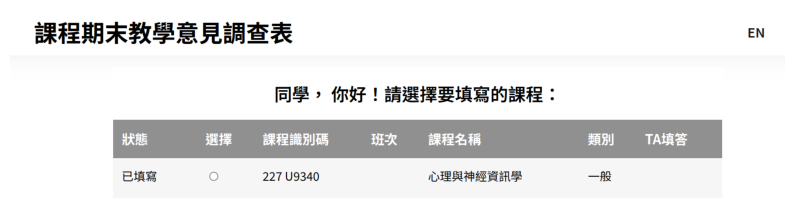

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('course_evaluation.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

## 2 Audio Segementation (4 points) 
Please use one audio/speech segementation method of your choice (including your own codes) to calculate:

[1] the number of segments, and <br>
[2] the total speech duration of all the segments (seconds)

of each .wav file in https://ceiba.ntu.edu.tw/course/4671ea/content/speech.zip .

In the following example, there are 5 segements and the total speech duration is the sum of yellow(+blue) periods.

<img src="https://www.irit.fr/recherches/SAMOVA/assets/images/segmentation3.gif">

In [1]:
import librosa
import glob
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def double_segmentation(audio, frame_length, hop_length, threshold, sr):

    # Init
    i = 0

    # Segmentation
    segments = librosa.effects.split(audio, top_db=10, frame_length=frame_length, hop_length=hop_length)
    num_segments = len(segments)

    # Durations
    duration_list = []

    while i < len(segments):
        segment = segments[i]
        duration = (segment[1] - segment[0]) / sr

        if duration > threshold:

            # Re-segment
            new_segments = librosa.effects.split(audio[segment[0]:segment[1]], top_db=10, frame_length=512, hop_length=64)

            # Append
            for new_segment in new_segments:
                new_duration = (new_segment[1] - new_segment[0]) / sr
                duration_list.append(new_duration)

            segments = np.delete(segments, i, axis=0)
            segments = np.insert(segments, i, new_segments + segment[0], axis=0)

            num_segments = num_segments - 1 + len(new_segments)

            i += len(new_segments)
        else:
            duration_list.append(duration)
            i += 1

    # Sort
    sorted_indices = np.argsort(segments[:, 0])
    segments = segments[sorted_indices]
    duration_list = np.array(duration_list)[sorted_indices]

    # Plot
    plt.figure(figsize=(14, 5))
    plt.ylim([min(audio)*1.2, max(audio)*1.2])
    librosa.display.waveshow(audio, sr=sr, alpha=0.5, color='b')

    for i, segment in enumerate(segments):
        plt.fill_betweenx([-1, 1], segment[0] / sr, segment[1] / sr, color='red', alpha=0.3, label=f'{i+1}: {duration_list[i]:.3f} seconds')
        plt.text((segment[0] + segment[1]) / (2 * sr), max(audio)*1.1, str(i+1), ha='center', va='center', color='black')

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio Segmentation')
    plt.legend()
    plt.show()

    print(f'Number of segments: {num_segments}')
    plt.show()

# Folder
for mood in ['anger', 'happy']:
    print(f'Mood: {mood}')
    folder_path = f'./speech/{mood}/'
    audio_files = glob.glob(folder_path + '*.wav')

    # Loop
    for audio_file in audio_files:

        # Load
        audio, sr = librosa.load(audio_file)

        # Param
        frame_length = 2048
        hop_length = 256
        threshold = 0.2

        double_segmentation(audio, frame_length, hop_length, threshold, sr)

ModuleNotFoundError: No module named 'librosa'